# Analyse des données d'expérience

Expérience: J7 Energie Solaire

Date: 2023-09-30

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Save figs for latex
import matplotlib as mpl
import tikzplotlib as tikz
from options import *

# print(mpl.rcParams.keys())

## Expérience 4: Reaction à des longueurs d'onde spécifiques

### Puissance lumineuse

In [3]:
pgamma = pd.read_csv("../data/Pgamma(filtre),d=42cm.csv", delimiter=", ", header=0)
pgamma

/tmp/ipykernel_20131/2359517054.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pgamma = pd.read_csv("../data/Pgamma(filtre),d=42cm.csv", delimiter=", ", header=0)


,Filtre,Pgamma [W/m^2]
0,Aucun,136.1
1,2B,111.7
2,8,111.0
3,16,108.4
4,25,91.2
5,87C,64.8
6,47,71.5
7,58,79.0


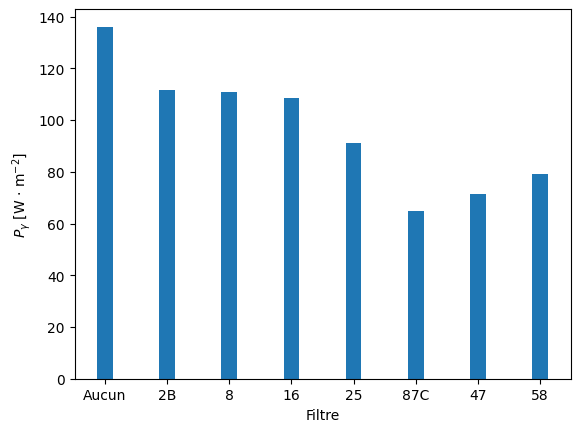

In [4]:
plt.bar(pgamma["Filtre"], pgamma["Pgamma [W/m^2]"], width=barwidth)
plt.xlabel("Filtre")
plt.ylabel("$P_{\gamma}$ [W $\cdot$ m$^{-2}$]")
tikz.save("../plots/Pgamma(filtre).tikz")

### Amorphe

/tmp/ipykernel_20131/3304237503.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  igamma = pd.read_csv("../data/Igamma(filtre),amorphe,d=42cm.csv", delimiter=", ")


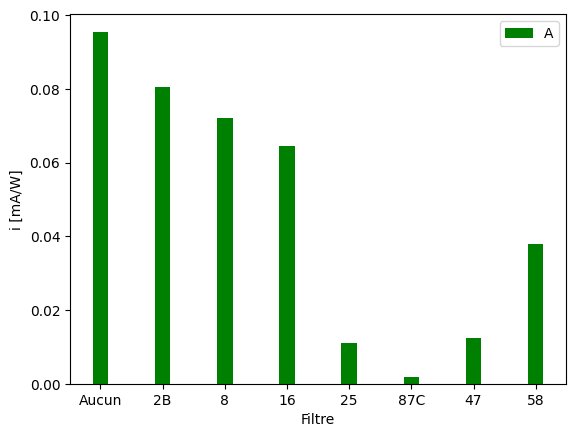

In [5]:
# i = Igamma / Pgamma
igamma = pd.read_csv("../data/Igamma(filtre),amorphe,d=42cm.csv", delimiter=", ")

# Fit data linearly
i = igamma["Igamma [mA]"] / pgamma["Pgamma [W/m^2]"]
x = np.arange(len(pgamma["Filtre"]))

plt.bar(x, i, capsize=10, width=barwidth, color=colors["A"], label="A")
plt.legend()
plt.xticks(x, pgamma["Filtre"])
plt.xlabel("Filtre")
plt.ylabel("i [mA/W]")
tikz.save("../plots/Igamma(filtre),A.tikz")

### Monocristallin

### Polycristallin

/tmp/ipykernel_20131/939627414.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  igamma = pd.read_csv("../data/Igamma(filtre),monocristallin,d=42cm.csv", delimiter=", ")
/tmp/ipykernel_20131/939627414.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  igamma = pd.read_csv("../data/Igamma(filtre),polycristallin,d=42cm.csv", delimiter=", ")


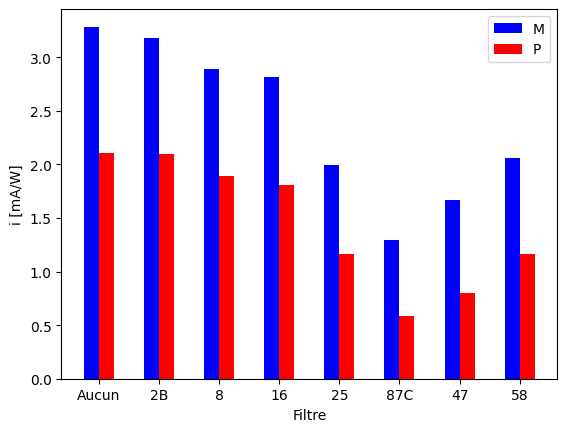

In [6]:
x = np.arange(len(igamma["Filtre"]))

igamma = pd.read_csv("../data/Igamma(filtre),monocristallin,d=42cm.csv", delimiter=", ")

# i = Igamma / Pgamma
i = igamma["Igamma [mA]"] / pgamma["Pgamma [W/m^2]"]

plt.bar(x, i, capsize=10, width=barwidth, color=colors["M"], label="M")

# i = Igamma / Pgamma
igamma = pd.read_csv("../data/Igamma(filtre),polycristallin,d=42cm.csv", delimiter=", ")
i = igamma["Igamma [mA]"] / pgamma["Pgamma [W/m^2]"]

plt.bar(x + barwidth, i, capsize=10, width=barwidth, color=colors["P"], label="P")

plt.legend()
plt.xticks(x + barwidth/2, igamma["Filtre"])
plt.xlabel("Filtre")
plt.ylabel("i [mA/W]")
tikz.save("../plots/Igamma(filtre),MP.tikz")